<a href="https://colab.research.google.com/github/rtajeong/M3/blob/main/lab46_opencv_obj_detect_rev1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  이미지 윤곽 추출
- findContours() 사용
- 원과 사각형 그림 다운로드
- https://www.dropbox.com/s/sgbgz5ese6ytjx9/im-circle-box.png

In [ ]:
!curl -L https://www.dropbox.com/s/sgbgz5ese6ytjx9/im-circle-box.png \
    -o im-circle.png

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   142    0   142    0     0    609      0 --:--:-- --:--:-- --:--:--   606
100   318  100   318    0     0    604      0 --:--:-- --:--:-- --:--:--   604
100  180k  100  180k    0     0   151k      0  0:00:01  0:00:01 --:--:--  151k


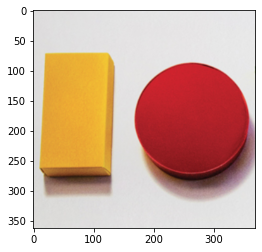

In [ ]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("im-circle.png")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

## 윤곽선 추출
- 이미지를 그레이로 스케일링하고 블러 처리한다 (노이지를 없앰)
- 이미지를 흑백을 이진화 코딩한다 (threshold() 사용)
- findContour()로 경계를 검출한다

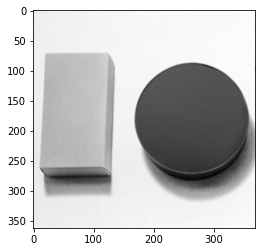

In [ ]:
gray1 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray1, cmap="gray")

## findContours
- 인자는, 이미지, 검출모드, 윤곽추출방법이다.
- 리턴값은, 윤곽이미지, 윤곽리스트, 계층정보 3가지이다.
- LIST는 단순한 윤곽 검출을 한다

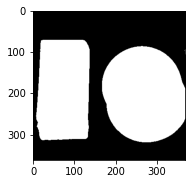

In [ ]:
# 필터 크기는 홀수로 지정한다, 표준편차는 0으로 지정하면 자동으로 생성한다
gray = cv2.GaussianBlur(gray1, (7, 7), 0) 
# 흑백으로 만든다, 임계값, 임계값을 넘었을 때 적용할 대체값, thresholding type
im2 = cv2.threshold(gray, 215, 301, cv2.THRESH_BINARY_INV)[1]

# 변환한 이미지 출력하기
plt.subplot(1, 2, 1)
plt.imshow(im2, cmap="gray")


*
*
*
167 85 203 234
*
7 70 130 244


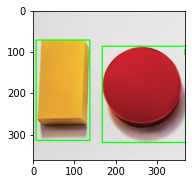

In [ ]:
# 윤곽 검출하기 (contour 를 찾는 방법, 찾을 때 사용하는 근사치)
cnts = cv2.findContours(im2, 
        cv2.RETR_LIST,
        cv2.CHAIN_APPROX_SIMPLE)[0]

for c in cnts:
    print('*')
    x, y, w, h = cv2.boundingRect(c)  # create an approximate rectangle
    # 너무 크거나 너무 작은 부분 제거하기
    if w < 5 or w > 500: continue
    print(x,y,w,h) # 결과 출력하기
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)

# 화면 오른쪽에 결과 출력하기
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
# plt.savefig("obj1.png", dpi=200)
plt.show()

In [ ]:
len(cnts)

4

In [ ]:
#  총 몇개의 윤곽선을 찾았는지 조사
import numpy as np
a = np.asarray(cnts)
a.shape

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


(4,)

## 우편번호 읽기
- cv2.threshold(): 
 - src: input image로 single-channel 이미지.(grayscale 이미지)
 - thresh: 임계값
 - maxval: 임계값을 넘었을 때 적용할 value
 - type: thresholding type
- cv2.findCountours(): 
 - finding contours is like finding white object from black background. So remember, object to be found should be white and background should be black.

In [ ]:
!curl -L https://www.dropbox.com/s/8qlxytrdn3ffaov/im-hagakil.png -o im-post.png

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   139    0   139    0     0    634      0 --:--:-- --:--:-- --:--:--   631
100   318  100   318    0     0    642      0 --:--:-- --:--:-- --:--:--   642
100  133k  100  133k    0     0   120k      0  0:00:01  0:00:01 --:--:--  120k


12


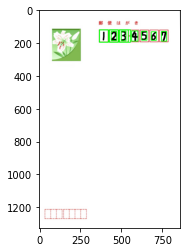

In [ ]:
def detect_zipno(fname):
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray, (3, 3), 0) 
    im2 = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY_INV)[1]
    
    # 윤곽 검출
    cnts = cv2.findContours(im2, 
        cv2.RETR_LIST,
        cv2.CHAIN_APPROX_SIMPLE)[0]
    
    result = []
    for pt in cnts:
        x, y, w, h = cv2.boundingRect(pt)
        if not(20 < w < 100): continue
        result.append([x, y, w, h])
    # 추출한 윤곽을 위치에 따라 정렬
    result = sorted(result, key=lambda x: x[0])
   # 테두리 출력하기
    for x, y, w, h in result:
        cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 3)
    return result, img

cnts, img = detect_zipno("im-post.png")
print(len(cnts))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

- 우편엽서
- https://www.dropbox.com/s/8qlxytrdn3ffaov/im-hagaki1.png

In [ ]:
cnts, img = detect_zipno("im-post.png")
len(cnts)

12

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:
/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:
/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead

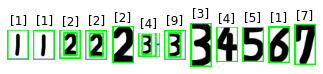

In [ ]:
from sklearn.externals import joblib
clf = joblib.load("digits.pkl")

cnts, img = detect_zipno("im-post.png")
for i, pt in enumerate(cnts):
    x, y, w, h = pt
    im2 = img[y:y+h, x:x+w]
    im2gray = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY) # 그레이스케일
    im2gray = cv2.resize(im2gray, (8, 8)) # 크기 변경
    im2gray = 15 - im2gray // 16 # 흑백 반전
    im2gray = im2gray.reshape((-1, 64)) # 차원 변환
    res = clf.predict(im2gray)
    plt.subplot(1, len(cnts)+1, i + 1)
    plt.imshow(im2)
    plt.axis("off")
    plt.title(res)

plt.show()

### colormap
- Q: I see an oddness when loading an image using opencv, convert to grayscale, and plot using matplotlib:

    from matplotlib import pyplot as plt
    import argparse
    import cv2

    image = cv2.imread("images/image1.jpg")
    image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    plt.imshow(image)

    But it gives a "grayscale" plot, why?
    
- It's because of the way Matplotlib maps single-channel output. It defaults to the "perceptially uniform" colourmap: blue->yellow; a bit like how you might expect a heatmap to be from blue to red, but theoretically clearer for human vision.
- There's some more details here that might help: https://matplotlib.org/users/colormaps.html